In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
!pip install catboost
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [5]:
pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation
RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [6]:
data_df=pd.read_csv("/content/creditcard.csv")

In [7]:
data_df.shape[1]


31

In [8]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000
mean,87384.361404,-0.025913,-0.017699,0.077013,0.018342,-0.030130,0.014143,-0.012766,0.001525,0.000412,0.000495,0.030962,-0.023570,0.003207,0.012587,0.018874,-0.001921,0.007823,-0.011737,-0.002564,0.003627,-0.001042,-0.007938,-0.004565,0.001145,0.016056,0.001144,-0.000634,0.000673,90.310332,0.001826
std,43797.031127,1.958384,1.663655,1.508987,1.415882,1.372251,1.325597,1.224968,1.194623,1.109452,1.088353,1.027675,1.024865,1.007657,0.964713,0.924978,0.881752,0.859804,0.841779,0.817177,0.778361,0.737726,0.718716,0.632706,0.605703,0.516480,0.484610,0.401242,0.330214,250.352826,0.042688
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,51121.000000,-0.930932,-0.609169,-0.759697,-0.841283,-0.720695,-0.752965,-0.563024,-0.203194,-0.653467,-0.527628,-0.730414,-0.431144,-0.655156,-0.409183,-0.569073,-0.473477,-0.470237,-0.508185,-0.466470,-0.208527,-0.225651,-0.535619,-0.164172,-0.350902,-0.297973,-0.329354,-0.070696,-0.051155,5.990000,0.000000
50%,78814.000000,0.006266,0.059821,0.272167,0.006723,-0.087094,-0.255660,0.024675,0.027344,-0.056592,-0.090631,-0.008482,0.125795,-0.012849,0.057107,0.077932,0.063476,-0.055094,-0.015127,-0.000409,-0.057853,-0.030374,0.001484,-0.016507,0.044334,0.043837,-0.057940,0.001936,0.013289,22.950000,0.000000
75%,129987.000000,1.276913,0.783677,1.084847,0.782975,0.576097,0.416600,0.552151,0.329577,0.605950,0.458722,0.778202,0.612332,0.669867,0.499670,0.681673,0.527430,0.405563,0.489712,0.464485,0.138499,0.179478,0.505977,0.138841,0.434168,0.361674,0.246427,0.089254,0.077737,79.200000,0.000000
max,158176.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [10]:
total = data_df.isnull().sum().sort_values(ascending=False)
print(total)

V24       1
V26       1
V25       1
Amount    1
V28       1
Class     1
V27       1
V7        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V15       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
V23       0
dtype: int64


In [12]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

trace = go.Bar(
    x=df['Class'],
    y=df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="crimson"),  
    text=df['values'],
    textposition='auto'  # show values on top of bars
)

layout = go.Layout(
    title='Credit Card Fraud Class - Data Unbalance (0 = Not fraud, 1 = Fraud)',
    xaxis=dict(title='Class', showticklabels=True),
    yaxis=dict(title='Number of transactions'),
    hovermode='closest',
    width=700,
    height=500,
    plot_bgcolor='rgba(240,240,240,0.95)',  # light grey background
    paper_bgcolor='white',                  # outer white
    font=dict(size=14)
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [13]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [14]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0.0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1.0,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0.0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1.0,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0.0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


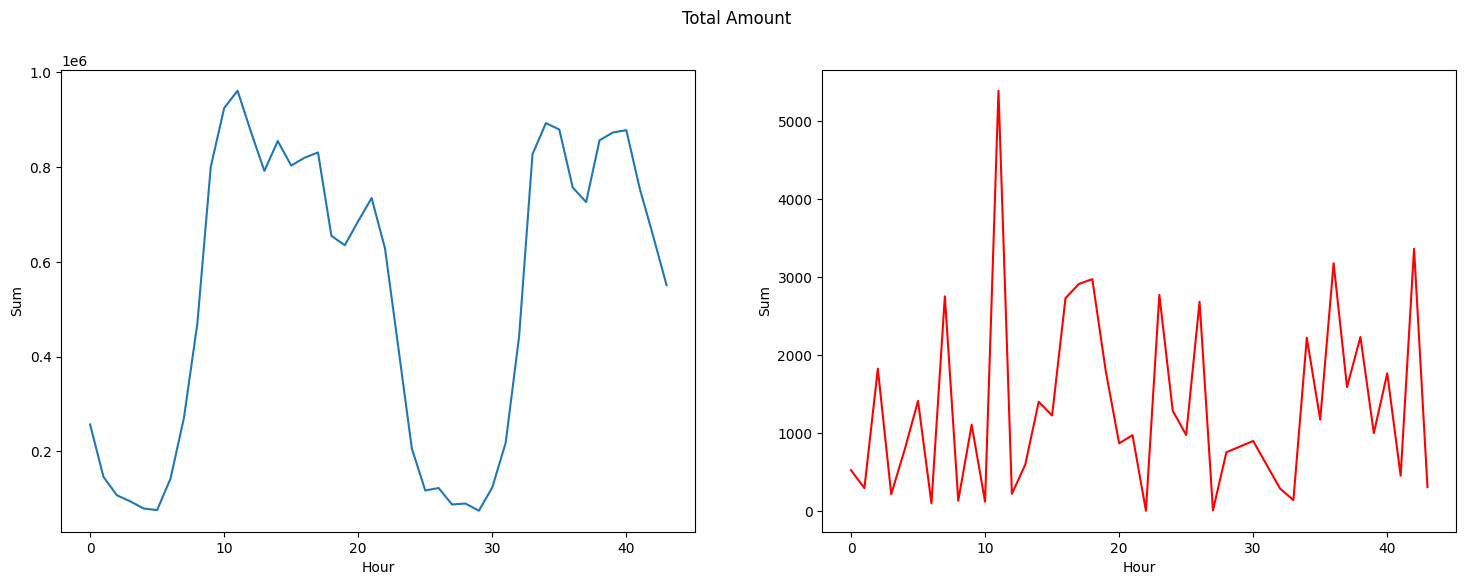

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

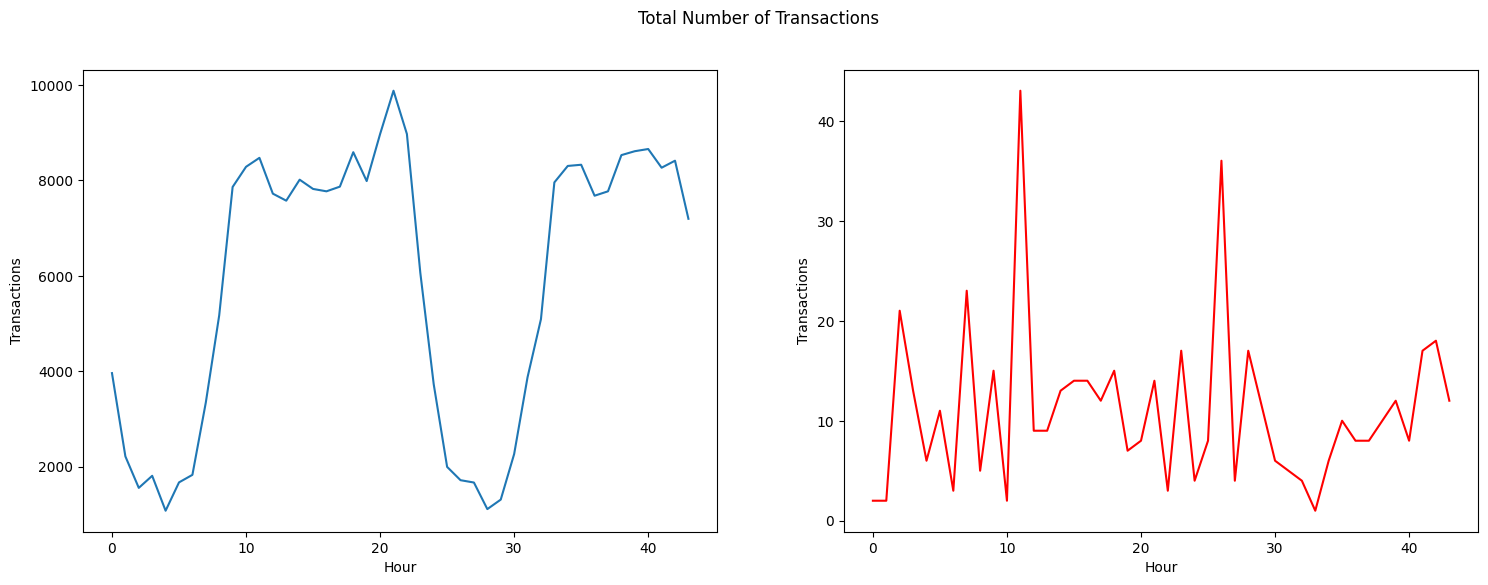

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

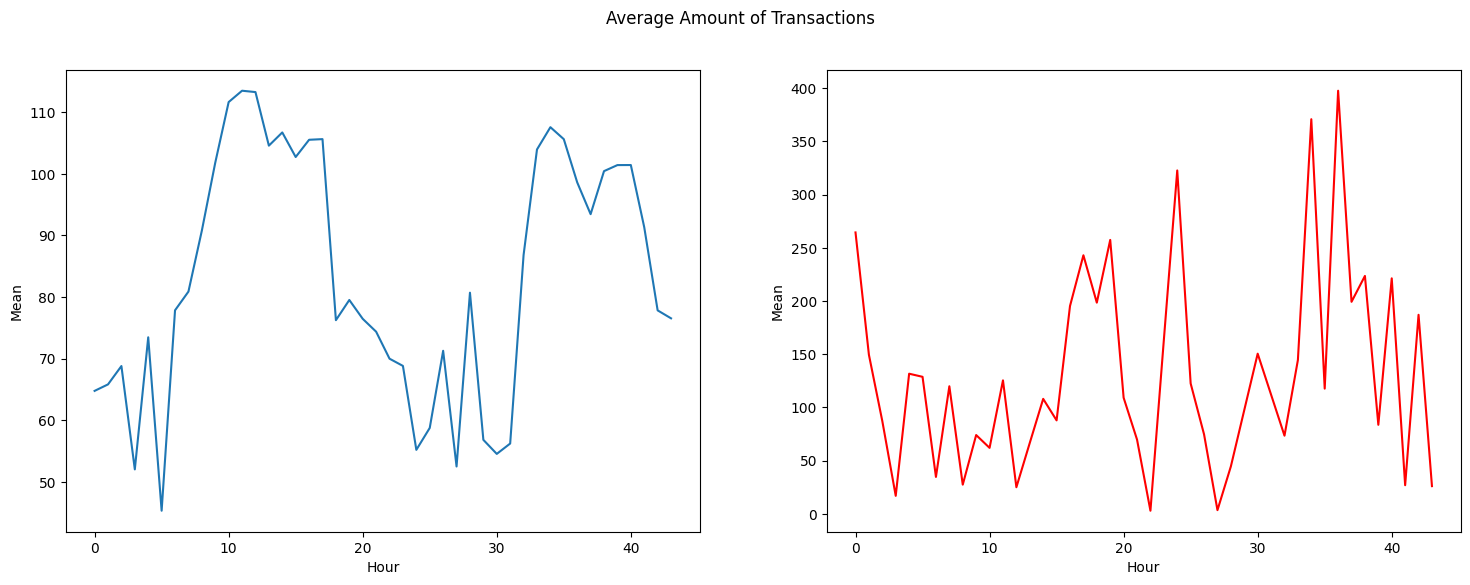

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

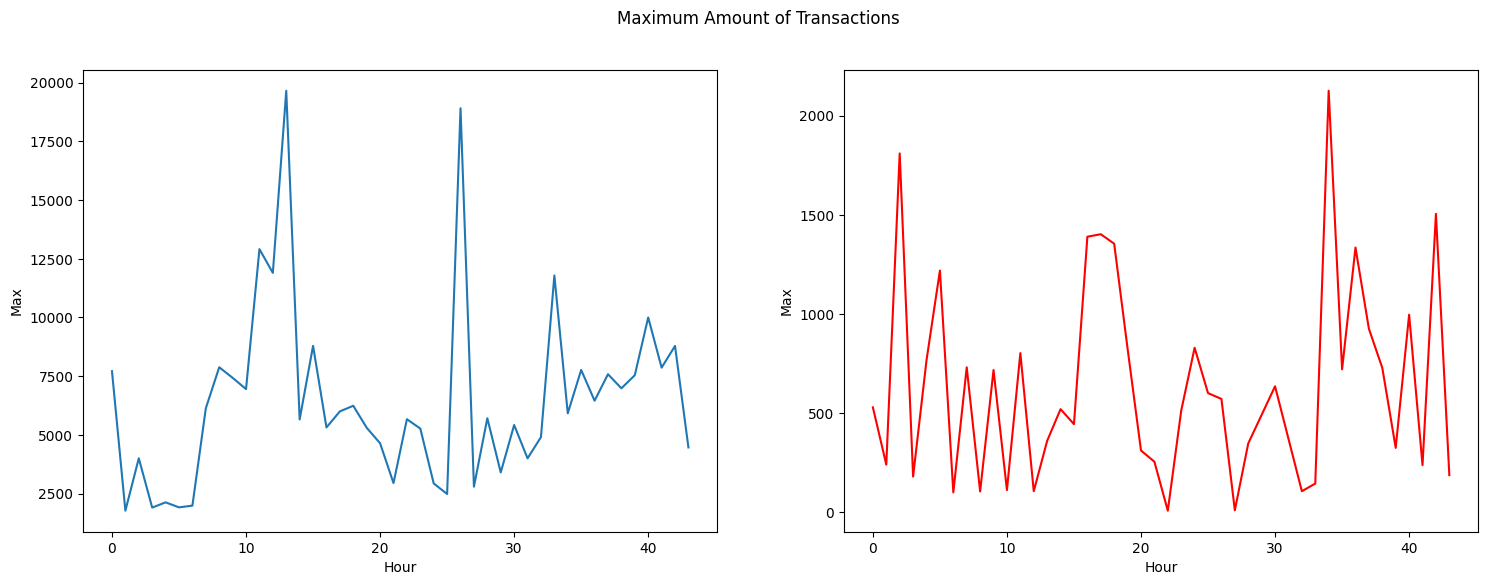

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

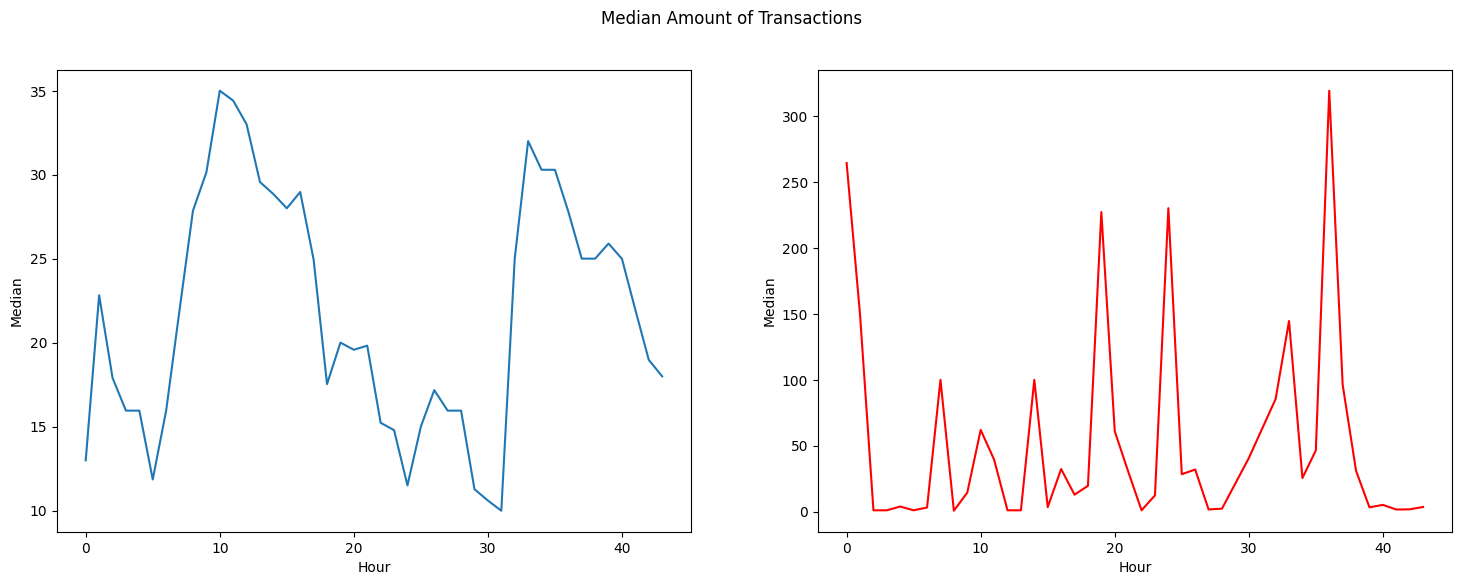

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

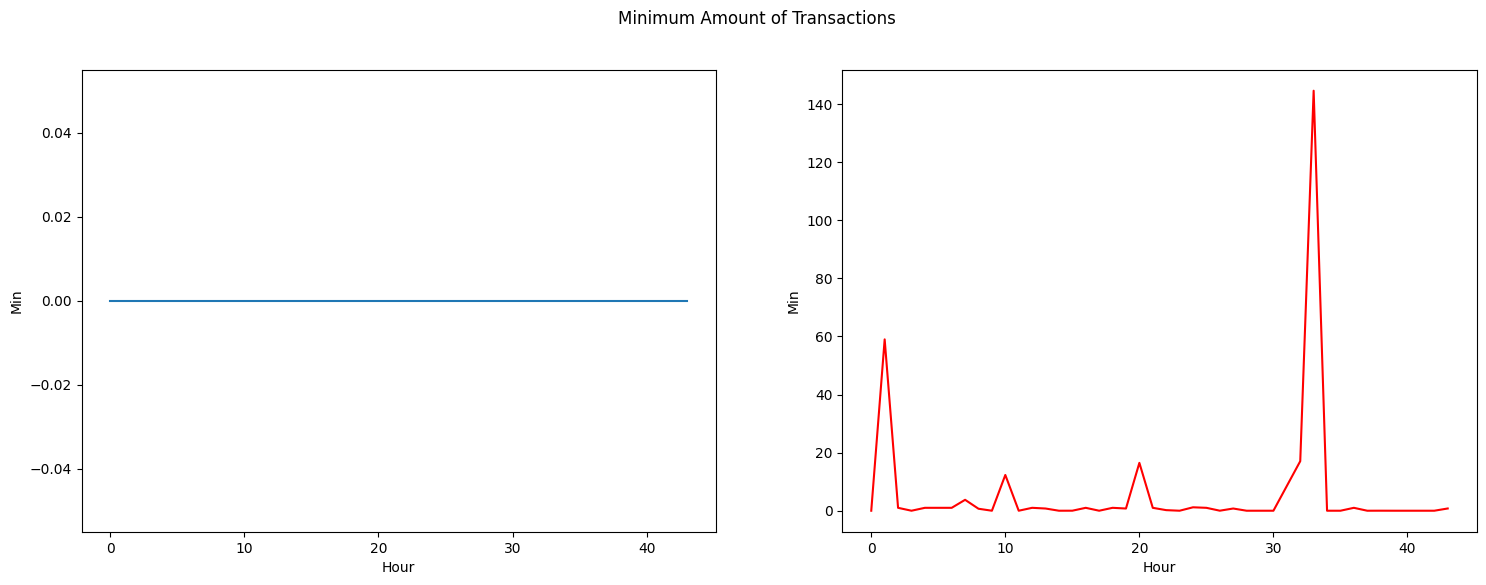

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

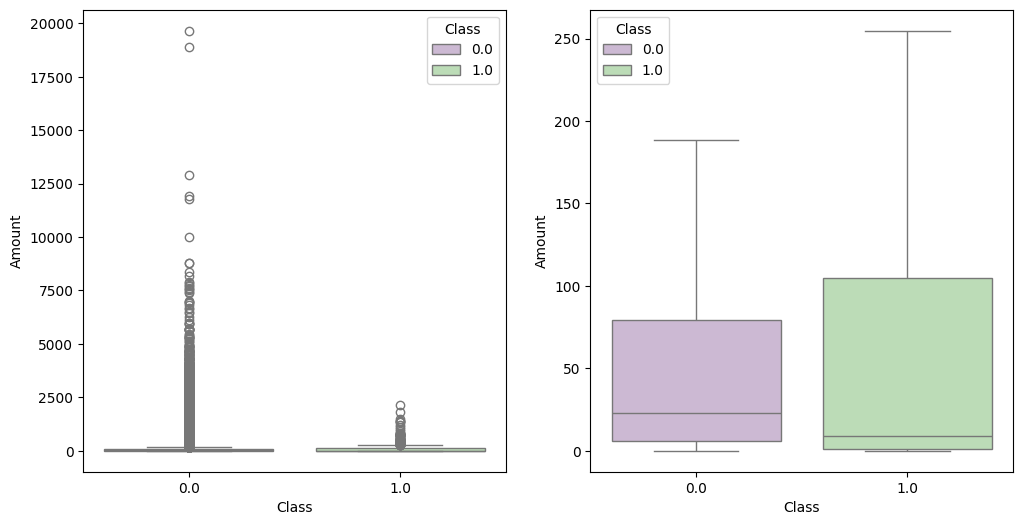

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [22]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

,Amount
count,256986.000000
mean,90.251211
std,250.331175
min,0.000000
25%,5.990000
50%,22.950000
75%,79.070000
max,19656.530000


In [23]:
class_1.describe()

,Amount
count,470.000000
mean,122.636404
std,260.193766
min,0.000000
25%,1.000000
50%,8.770000
75%,104.615000
max,2125.870000


In [24]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

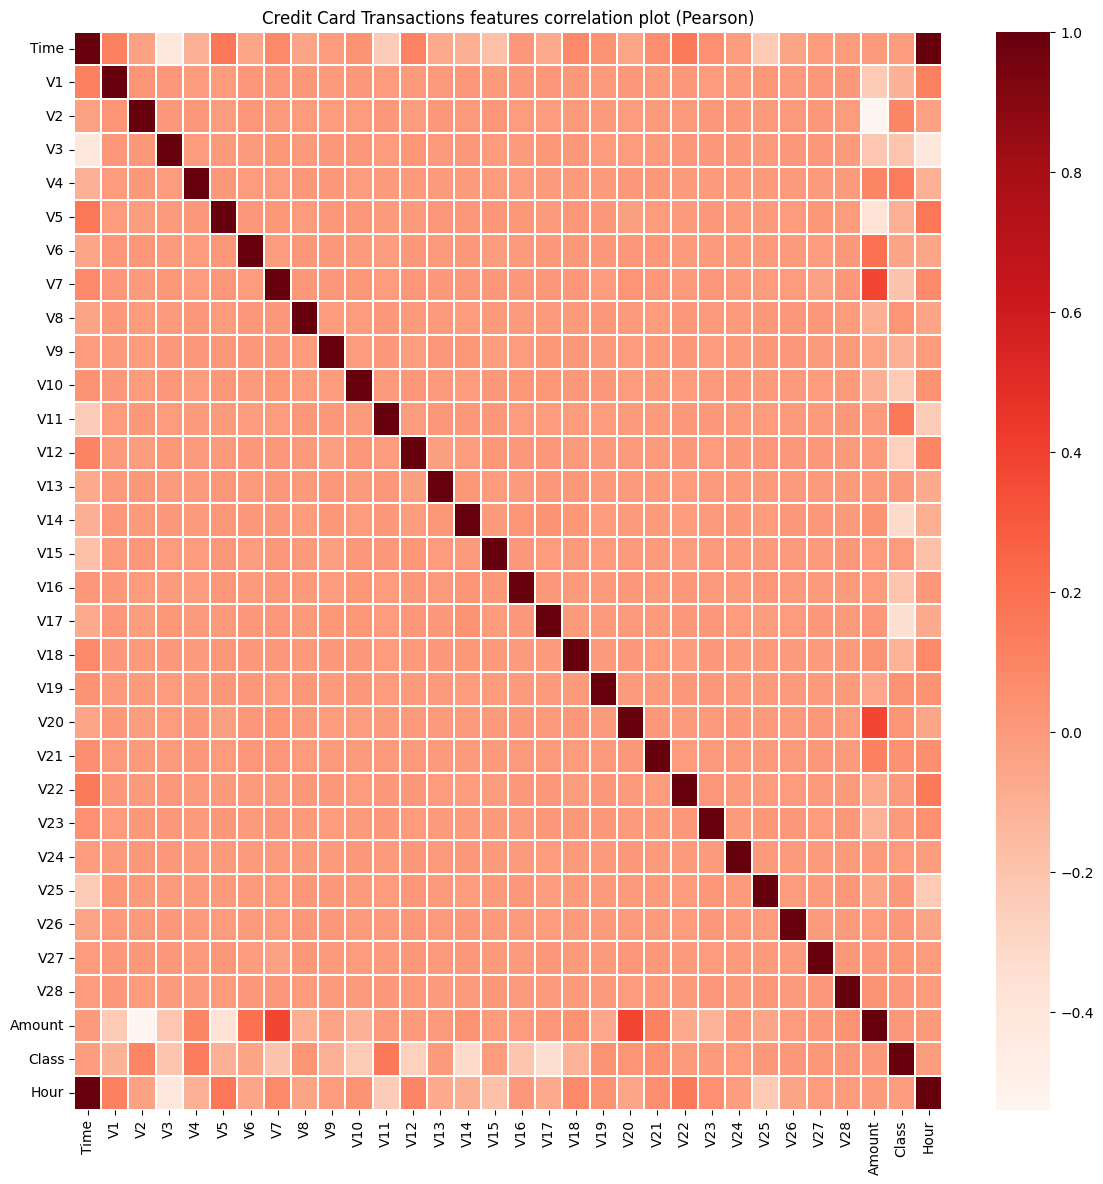

In [25]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

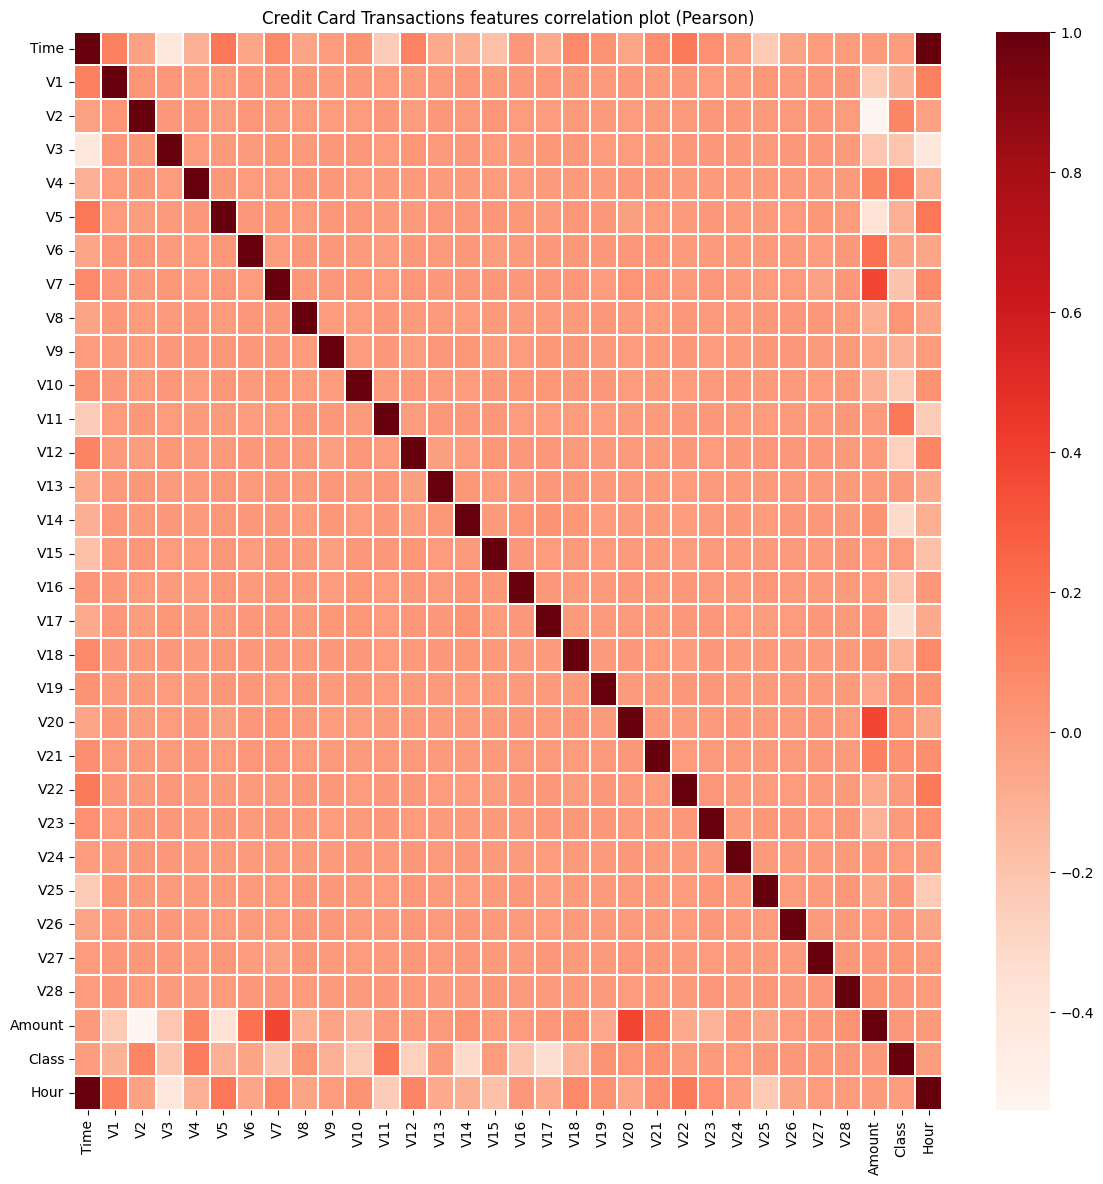

In [26]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

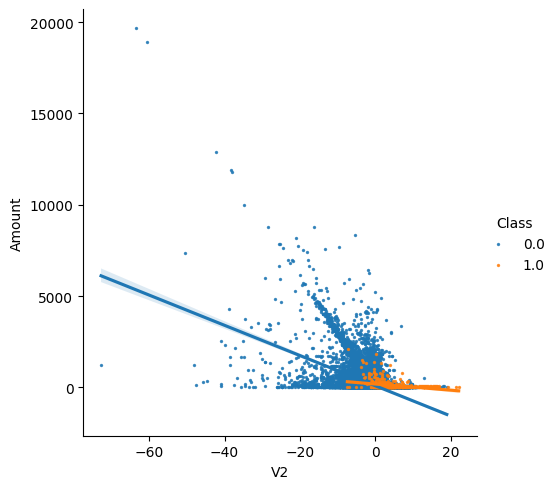

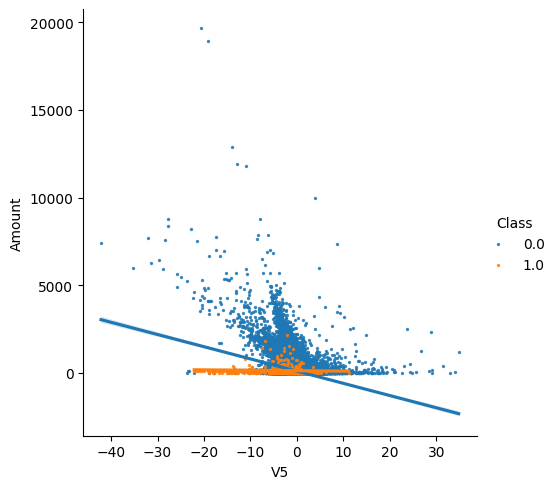

In [27]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


/tmp/ipython-input-955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/tmp/ipython-input-955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/tmp/ipython-input-955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/tmp/ipython-input-955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

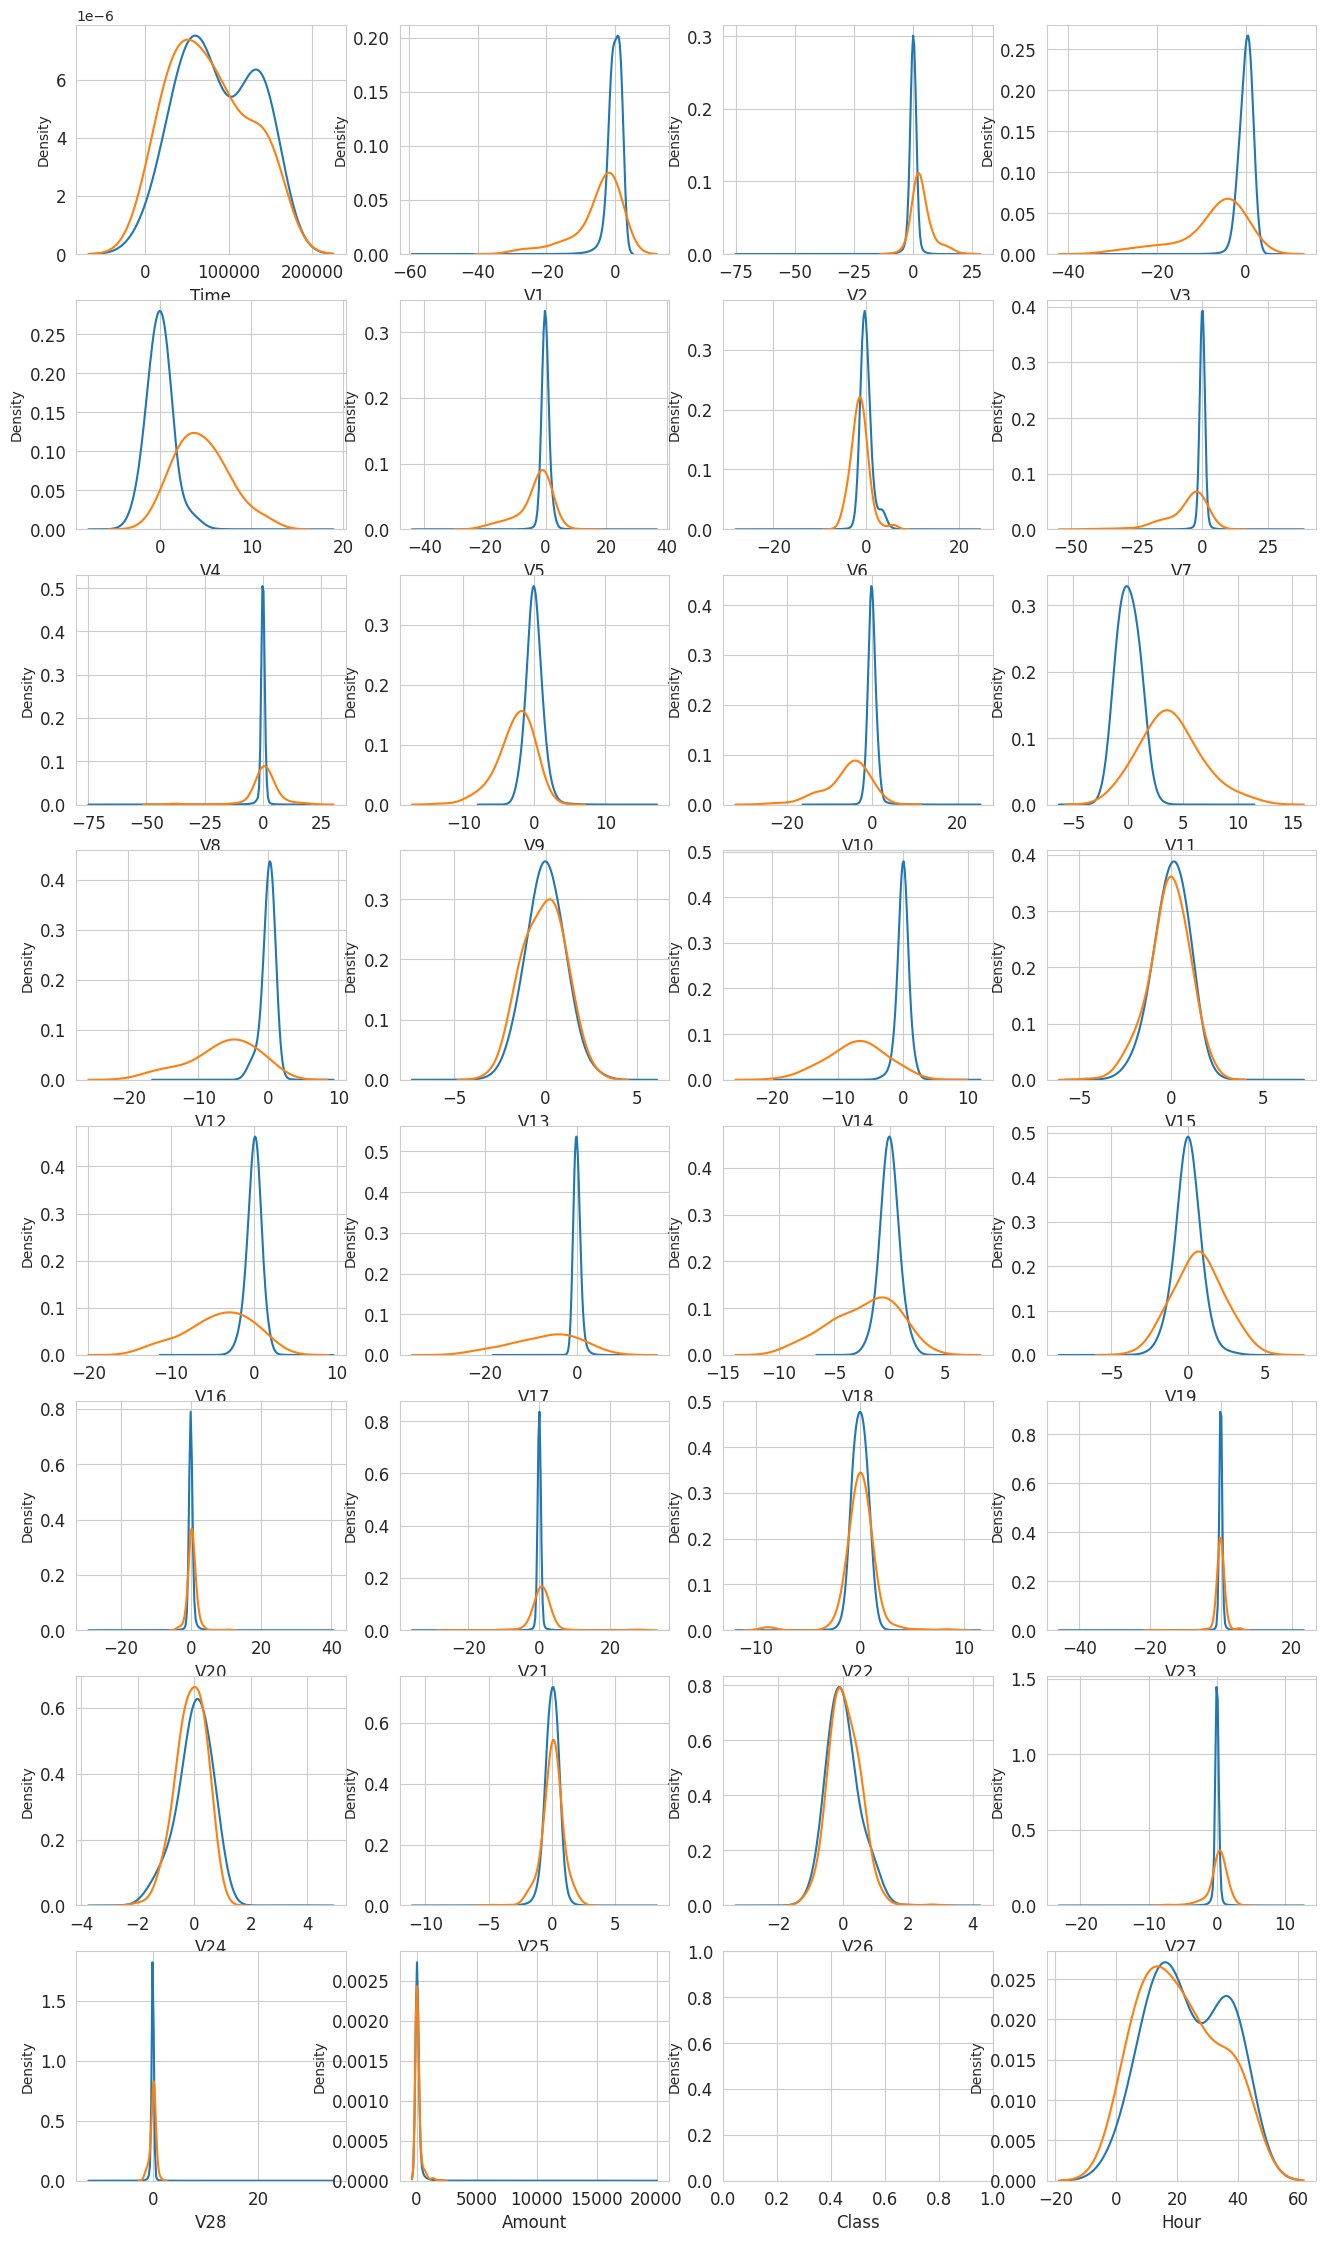

In [28]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Predictive Models


In [29]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [30]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

RandomClassifier

In [31]:
clf = RandomForestClassifier(n_jobs=NO_JOBS,
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [35]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [36]:
preds = clf.predict(valid_df[predictors])

/tmp/ipython-input-1428594667.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



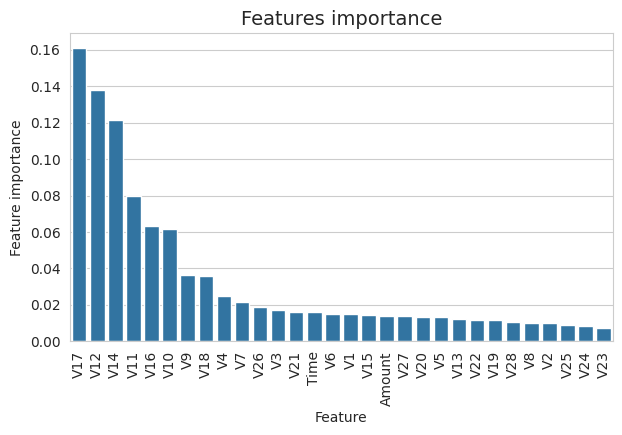

In [37]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

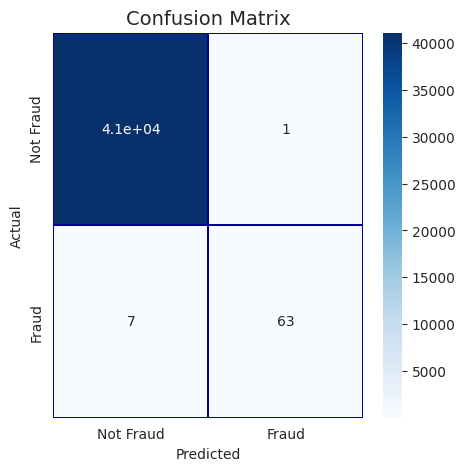

In [38]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [39]:
roc_auc_score(valid_df[target].values, preds)

np.float64(0.9499878413539868)

In [40]:
score = roc_auc_score(valid_df[target].values, preds)
print(float(score))


0.9499878413539868


AdaBoost

In [45]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,

                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [47]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [48]:
preds = clf.predict(valid_df[predictors])

/tmp/ipython-input-3562096361.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



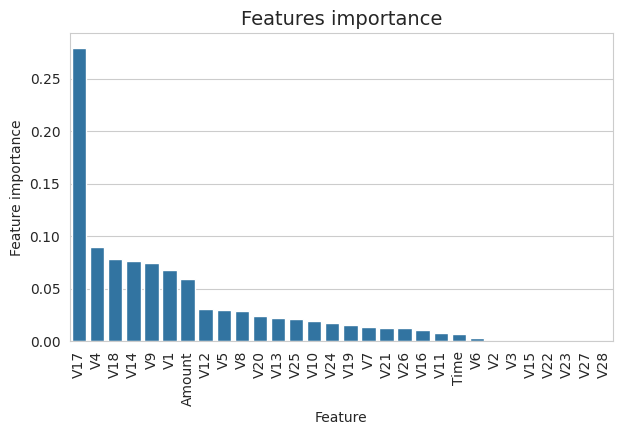

In [49]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

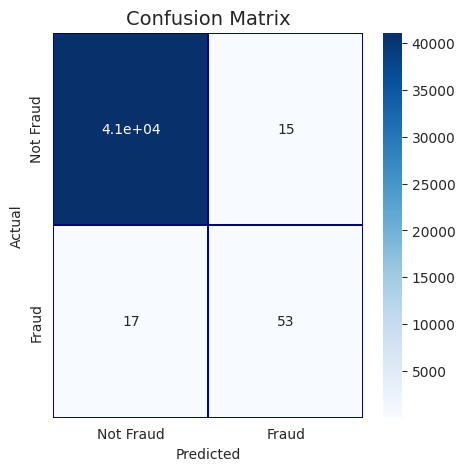

In [50]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [52]:
score=roc_auc_score(valid_df[target].values, preds)
print(score)

0.8783890488812308


CatBoost

In [53]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [54]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 915ms	remaining: 7m 36s
50:	total: 31.3s	remaining: 4m 35s
100:	total: 1m	remaining: 3m 58s
150:	total: 1m 30s	remaining: 3m 28s
200:	total: 1m 57s	remaining: 2m 55s
250:	total: 2m 25s	remaining: 2m 24s
300:	total: 2m 52s	remaining: 1m 54s
350:	total: 3m 20s	remaining: 1m 25s
400:	total: 3m 48s	remaining: 56.4s
450:	total: 4m 17s	remaining: 27.9s
499:	total: 4m 44s	remaining: 0us


In [55]:
preds = clf.predict(valid_df[predictors])

/tmp/ipython-input-3992975389.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



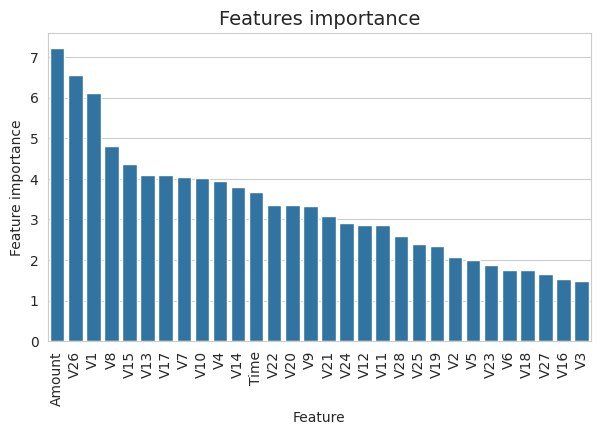

In [56]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

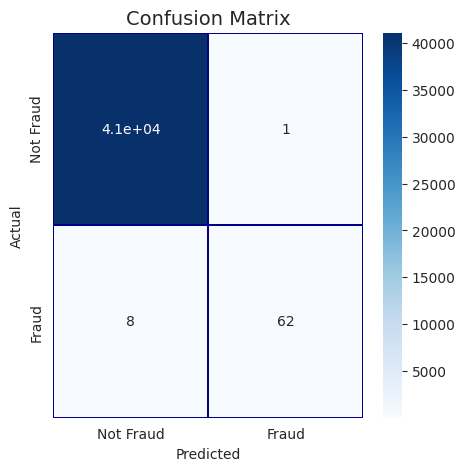

In [57]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [58]:
roc_auc_score(valid_df[target].values, preds)

np.float64(0.9428449842111296)

XGBoost

In [60]:
import numpy as np

# Function to clean NaN / inf values in both features and target
def clean_data(df, predictors, target):
    df = df.copy()
    # Remove rows where target is NaN or inf
    df = df[~df[target].isna()]
    df = df[~np.isinf(df[target])]
    # Replace inf in predictors with NaN, then fill with median
    df[predictors] = df[predictors].replace([np.inf, -np.inf], np.nan)
    df[predictors] = df[predictors].fillna(df[predictors].median())
    return df

# Clean datasets
train_df = clean_data(train_df, predictors, target)
valid_df = clean_data(valid_df, predictors, target)
test_df  = clean_data(test_df, predictors, target)

# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], label=train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], label=valid_df[target].values)
dtest  = xgb.DMatrix(test_df[predictors],  label=test_df[target].values)

# What to monitor
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc',
    'random_state': RANDOM_STATE
}


In [61]:
model = xgb.train(params,
                dtrain,
                MAX_ROUNDS,
                watchlist,
                early_stopping_rounds=EARLY_STOP,
                maximize=True,
                verbose_eval=VERBOSE_EVAL)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:726: FutureWarning:

Pass `evals` as keyword args.



[0]	train-auc:0.91608	valid-auc:0.95367
[50]	train-auc:0.98632	valid-auc:0.98353
[100]	train-auc:0.99211	valid-auc:0.98648
[150]	train-auc:0.99401	valid-auc:0.98733
[200]	train-auc:0.99557	valid-auc:0.98901
[250]	train-auc:0.99672	valid-auc:0.98880
[274]	train-auc:0.99711	valid-auc:0.98903


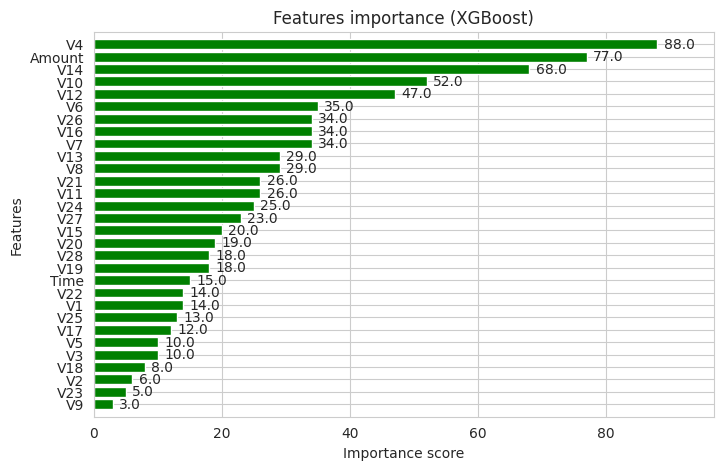

In [62]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

In [63]:
preds = model.predict(dtest)

In [64]:
roc_auc_score(test_df[target].values, preds)

np.float64(0.9776350883961685)

LightGBM

In [65]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }

In [66]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [74]:
train_set = lgb.Dataset(train_df[predictors], label=train_df[target])
valid_set = lgb.Dataset(valid_df[predictors], label=valid_df[target])

evals_results = {}

model = lgb.train(
    params,
    train_set,
    num_boost_round=MAX_ROUNDS,
    valid_sets=[train_set, valid_set],
    valid_names=['train', 'valid'],
    feval=None,
    callbacks=[
        lgb.early_stopping(2 * EARLY_STOP),
        lgb.record_evaluation(evals_results),
        lgb.log_evaluation(period=VERBOSE_EVAL)
    ]
)


Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.965635	valid's auc: 0.967397
[100]	train's auc: 0.973777	valid's auc: 0.964304
Early stopping, best iteration is:
[22]	train's auc: 0.952147	valid's auc: 0.972681


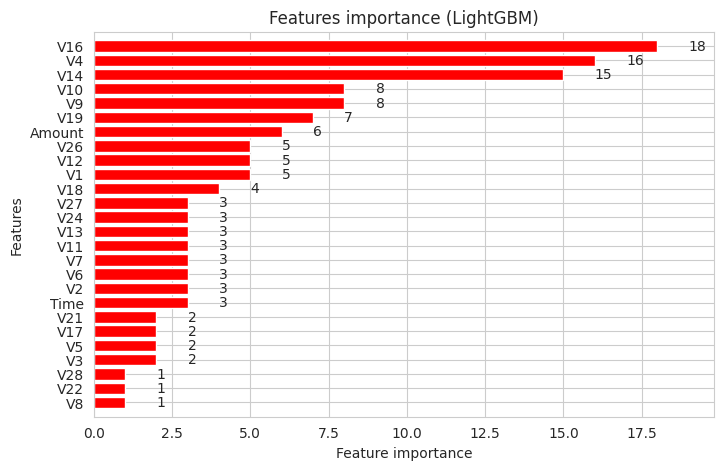

In [75]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

In [76]:
preds = model.predict(test_df[predictors])

In [77]:
score = roc_auc_score(test_df[target].values, preds)
print(score)

0.8915144894208993


In [80]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

kf = KFold(n_splits=NUMBER_KFOLDS, random_state=RANDOM_STATE, shuffle=True)

oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0

for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]

    model = LGBMClassifier(
        n_jobs=-1,
        n_estimators=2000,
        learning_rate=0.01,
        num_leaves=80,
        colsample_bytree=0.98,
        subsample=0.78,
        reg_alpha=0.04,
        reg_lambda=0.073,
        subsample_for_bin=50,
        boosting_type='gbdt',
        is_unbalance=False,
        min_split_gain=0.025,
        min_child_weight=40,
        min_child_samples=510,
        objective='binary',
        metric='auc',
        verbosity=-1
    )

    model.fit(
        train_x, train_y,
        eval_set=[(train_x, train_y), (valid_x, valid_y)],
        eval_metric='auc',
        callbacks=[
            early_stopping(EARLY_STOP),
            log_evaluation(VERBOSE_EVAL)
        ]
    )

    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print(f'Fold {n_fold + 1} AUC : {roc_auc_score(valid_y, oof_preds[valid_idx]):.6f}')

    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold += 1

train_auc_score = roc_auc_score(train_df[target], oof_preds)
print(f'Full AUC score {train_auc_score:.6f}')



Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.974324	valid_1's auc: 0.964458
[100]	training's auc: 0.972953	valid_1's auc: 0.961728
Early stopping, best iteration is:
[67]	training's auc: 0.973604	valid_1's auc: 0.966368
Fold 1 AUC : 0.966368
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.972485	valid_1's auc: 0.975398
Early stopping, best iteration is:
[26]	training's auc: 0.97047	valid_1's auc: 0.97789
Fold 2 AUC : 0.977890
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.970575	valid_1's auc: 0.955749
Early stopping, best iteration is:
[12]	training's auc: 0.972208	valid_1's auc: 0.96113
Fold 3 AUC : 0.961130
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.966473	valid_1's auc: 0.963611
[100]	training's auc: 0.974721	valid_1's auc: 0.970561
[150]	training's auc: 0.9761	valid_1's auc: 0.975451
[200]	training's auc: 0.974944	valid_1's auc: 0

In [81]:
pred = test_preds


1.  RandomClassifier - 94.99
2.  AdaBoost - 87.83
3. CatBoost - 94.48
4. XGBoost - 97.76
5. LightGBM - 95.63
